In [2]:
!pip install tensorflow matplotlib numpy pandas scikit-learn

In [88]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import os


In [90]:
import tensorflow as tf
import matplotlib
import numpy
import pandas
import sklearn

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [94]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to training and validation folders
train_dir = r"C:\Users\neha_\OneDrive\Desktop\RiceLeafDisease\archive\RiceLeafsDisease\train"
val_dir = r"C:\Users\neha_\OneDrive\Desktop\RiceLeafDisease\archive\RiceLeafsDisease\validation"

# Image preprocessing
img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)



Found 1050 images belonging to 3 classes.
Found 264 images belonging to 3 classes.


In [96]:
print("Train classes:", train_data.class_indices)
print("Validation classes:", val_data.class_indices)


Train classes: {'bacterial_leaf_blight': 0, 'brown_spot': 1, 'healthy': 2}
Validation classes: {'bacterial_leaf_blight': 0, 'brown_spot': 1, 'healthy': 2}


In [98]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load pre-trained ResNet50 model + higher level layers
base_model = ResNet50(
    weights='imagenet',
    include_top=False,           # Exclude the final FC layer
    input_shape=(224, 224, 3)    # Match your input image size
)

# Freeze the convolutional base
base_model.trainable = False

# Build the full model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),      # Replace Flatten to reduce overfitting
    layers.Dense(128, activation='relu'), # Intermediate FC layer
    layers.Dropout(0.5),                  # Dropout for regularization
    layers.Dense(3, activation='softmax')  # Final classification layer
])

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,371 (90.98 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [100]:
print(train_data.class_indices)


{'bacterial_leaf_blight': 0, 'brown_spot': 1, 'healthy': 2}


In [102]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
   )


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.3957 - loss: 1.1676 - val_accuracy: 0.6364 - val_loss: 0.8511
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.5996 - loss: 0.8831 - val_accuracy: 0.6894 - val_loss: 0.7786
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 154s 5s/step - accuracy: 0.5819 - loss: 0.8751 - val_accuracy: 0.6591 - val_loss: 0.7784
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.6429 - loss: 0.8488 - val_accuracy: 0.7045 - val_loss: 0.7438
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 153s 5s/step - accuracy: 0.6521 - loss: 0.8145 - val_accuracy: 0.6970 - val_loss: 0.7295
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 165s 5s/step - accuracy: 0.6340 - loss: 0.7902 - val_accuracy: 0.6932 - val_loss: 0.7103
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 157s 5s/step - accuracy: 0.6829 - loss: 0.7765 - val_accuracy: 0.7083 - val_loss: 0.7012
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 159s 5s/step - accuracy: 0.6384 - loss: 0.7690 - val_accuracy: 0.7121 - v

In [105]:
model.save('my_model.keras')  

In [107]:
import os
print(os.getcwd())


C:\Users\neha_


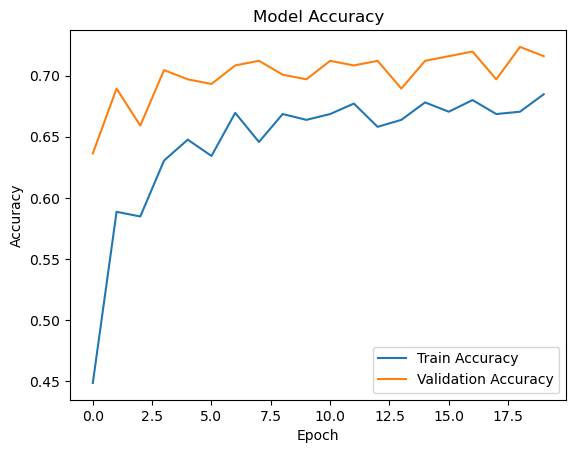

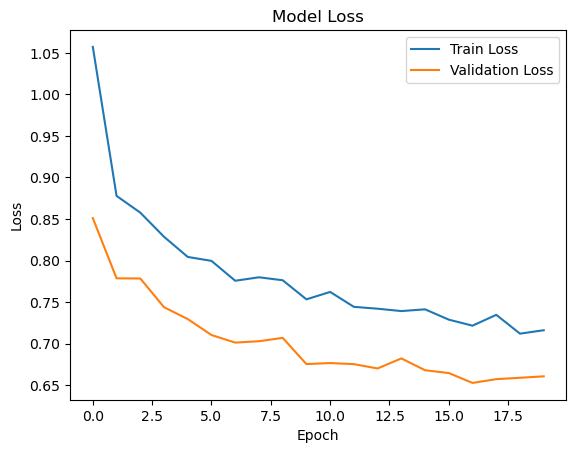

In [109]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [111]:
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc:.2f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7041 - loss: 0.6839
Validation Accuracy: 0.72


In [125]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)

    if predicted_index >= len(class_names):
        print(f"Invalid prediction index: {predicted_index}. Check your model and class_names.")
        return

    predicted_class = class_names[predicted_index]
    confidence = 100 * np.max(prediction)

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    print(f"\n✅ Prediction: {predicted_class}")
    print(f"✅ Confidence: {confidence:.2f}%")



In [127]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Manually assign classes in correct order
class_names = ['bacterial_leaf_blight', 'brown_spot', 'healthy']

def predict_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    print("Prediction shape:", prediction.shape)
    print("Prediction array:", prediction)
    print("class_names:", class_names)

    predicted_index = np.argmax(prediction)

    if predicted_index >= len(class_names):
        print(f"Invalid prediction index: {predicted_index}. Check your model and class_names.")
        return

    predicted_class = class_names[predicted_index]
    confidence = 100 * np.max(prediction)

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    print(f"\n✅ Prediction: {predicted_class}")
    print(f"✅ Confidence: {confidence:.2f}%")


In [129]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)


In [48]:
print("Class indices:", val_data.class_indices)


Class indices: {'bacterial_leaf_blight': 0, 'brown_spot': 1, 'healthy': 2}


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Prediction shape: (1, 3)
Prediction array: [[0.74874127 0.20582591 0.04543288]]
class_names: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


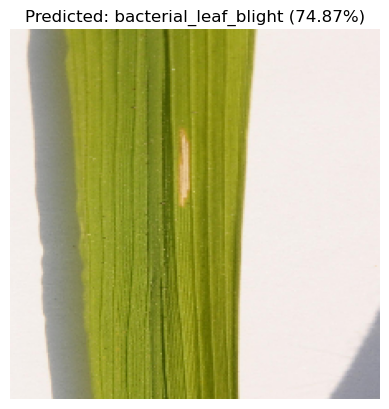


✅ Prediction: bacterial_leaf_blight
✅ Confidence: 74.87%


In [131]:
predict_image(r"C:\Users\neha_\OneDrive\Desktop\RiceLeafDisease\archive\RiceLeafsDisease\validation\bacterial_leaf_blight\bacterial_val (10).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Prediction shape: (1, 3)
Prediction array: [[0.11163676 0.7092195  0.17914374]]
class_names: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


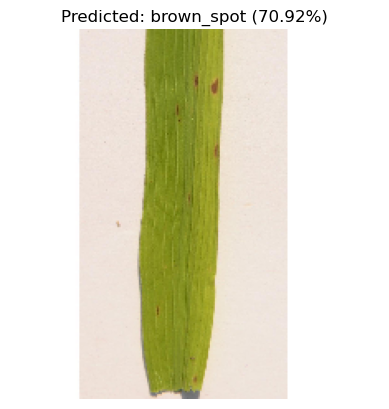


✅ Prediction: brown_spot
✅ Confidence: 70.92%


In [52]:
predict_image(r'C:\Users\neha_\Downloads\archive\RiceLeafsDisease\validation\brown_spot\brown_val (22).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Prediction shape: (1, 3)
Prediction array: [[0.50356936 0.34177175 0.15465881]]
class_names: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


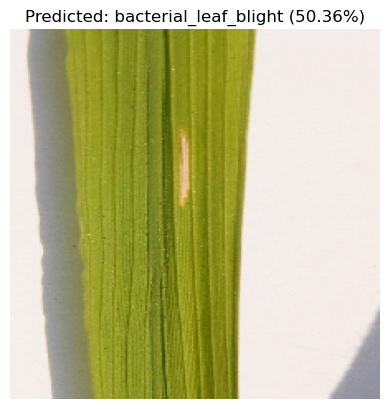


✅ Prediction: bacterial_leaf_blight
✅ Confidence: 50.36%


In [136]:
predict_image(r'C:\Users\neha_\Downloads\archive\RiceLeafsDisease\validation\bacterial_leaf_blight\bacterial_val (10).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Prediction shape: (1, 3)
Prediction array: [[0.34801564 0.41592598 0.2360584 ]]
class_names: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


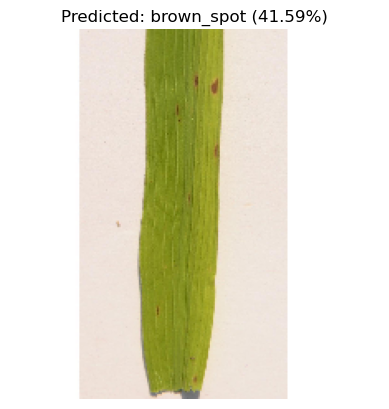


✅ Prediction: brown_spot
✅ Confidence: 41.59%


In [134]:
predict_image(r'C:\Users\neha_\Downloads\archive\RiceLeafsDisease\validation\brown_spot\brown_val (22).JPG')

In [54]:
from tensorflow.keras.models import load_model

model = load_model(r'my_model.keras')  


In [56]:
model = load_model('my_model.keras', compile=False)


In [68]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [58]:
class_names = ['brown_spot', 'bacterial_leaf_blight', 'healthy']  


In [66]:
print(model.output_shape)


(None, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Prediction shape: (1, 3)
Prediction array: [[0.50356936 0.34177175 0.15465881]]
class_names: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


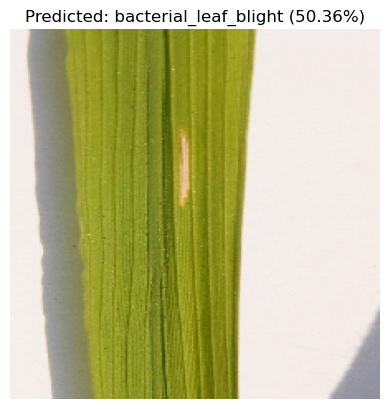


✅ Prediction: bacterial_leaf_blight
✅ Confidence: 50.36%


In [53]:
predict_image(r"C:\Users\neha_\Downloads\archive\RiceLeafsDisease\validation\bacterial_leaf_blight\bacterial_val (10).JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Prediction shape: (1, 3)
Prediction array: [[0.5434597  0.31581402 0.14072631]]
class_names: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


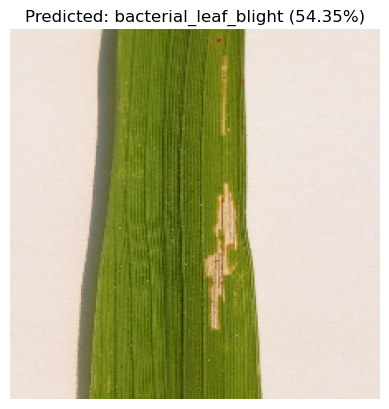


✅ Prediction: bacterial_leaf_blight
✅ Confidence: 54.35%


In [55]:
predict_image(r"C:\Users\neha_\Downloads\archive\RiceLeafsDisease\validation\bacterial_leaf_blight\bacterial_val (12).JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
Prediction shape: (1, 3)
Prediction array: [[0.39407817 0.39324155 0.21268027]]
class_names: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


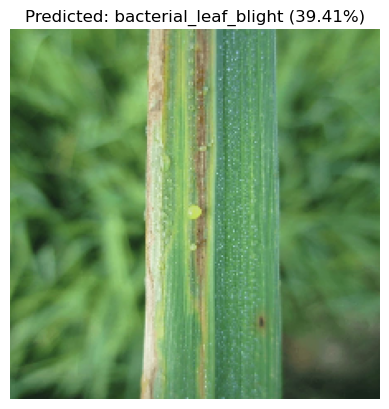


✅ Prediction: bacterial_leaf_blight
✅ Confidence: 39.41%


In [57]:
predict_image(r"C:\Users\neha_\Downloads\bacterial-rice-leaf-blight-disease-600nw-1613468029.webp")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
Prediction shape: (1, 3)
Prediction array: [[0.7122479  0.22975764 0.0579944 ]]
class_names: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


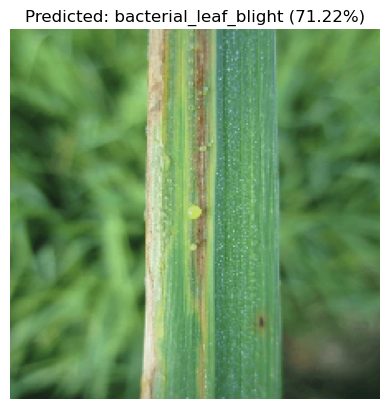


✅ Prediction: bacterial_leaf_blight
✅ Confidence: 71.22%


In [133]:
predict_image(r"C:\Users\neha_\Downloads\predictthis.webp")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Prediction shape: (1, 3)
Prediction array: [[0.00370019 0.21465604 0.78164387]]
class_names: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


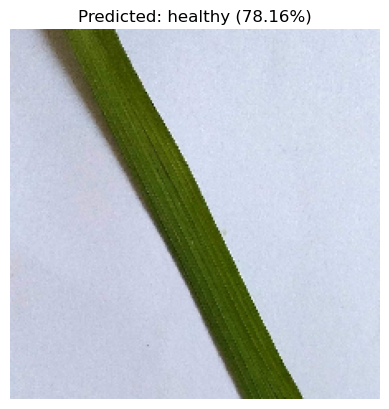


✅ Prediction: healthy
✅ Confidence: 78.16%


In [135]:
predict_image(r"C:\Users\neha_\OneDrive\Desktop\RiceLeafDisease\archive\RiceLeafsDisease\validation\healthy\healthy_val (25).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Prediction shape: (1, 3)
Prediction array: [[0.10839206 0.72154456 0.17006338]]
class_names: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


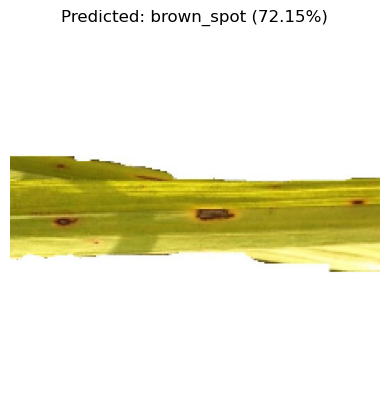


✅ Prediction: brown_spot
✅ Confidence: 72.15%


In [40]:
predict_image(r"C:\Users\neha_\Downloads\archive\RiceLeafsDisease\validation\brown_spot\brown_val (58).jpg")

In [61]:
print("Done")

Done
